In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.applications import inception_resnet_v2

from keras.models import Model

from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import keras


%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.15.0


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# Resnet **50**

In [0]:
model_name = 'resnet50.h5'
batch_size = 32

In [0]:
import keras, os
import keras.backend as K

class CSVLoggerV2(keras.callbacks.CSVLogger):
    def __init__(self, *args, **kwargs):
        super (CSVLoggerV2, self).__init__(*args, **kwargs)
        
    def on_epoch_end (self, epoch, logs = None):
        logs.update({'lr':K.eval(self.model.optimizer.lr)})
        super (CSVLoggerV2, self).on_epoch_end(epoch, logs)
        
    
    def on_train_begin(self, logs=None):
        header = None
        if self.append:
            if os.path.exists(self.filename):
                import pandas as pd
                try:
                    csv_file = pd.read_csv(self.filename)
                    if 'lr' in cvs_file.columns:
                        column = csv_file['lr']
                        lr = column[len(column)-1]
                        K.set_value(self.model.optimizer.lr, lr)
                except:
                    pass
        super (CSVLoggerV2, self).on_train_begin(logs)

In [0]:
from keras import applications

# Model Architecture

In [0]:
img_height,img_width = 224,224 
num_classes = 14
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
r50 = Model(inputs = base_model.input, outputs = predictions)

In [0]:
r50.load_weights('/content/gdrive/My Drive/Inception/Resnet 50/' + model_name)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

r50.load_weights('/content/gdrive/My Drive/Inception/Resnet 50/' + model_name)
r50.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## Preparation of Data Generators

The Available data classes are given below. Their distribution is provided below in the relevant cells.

* Night_Market 
* Day_Underpass 
* Day_Intersection 
* Night_Expressway 
* Day_NoIntersection 
* Day_Expressway 
* Night_Underpass 
* Night_NoIntersection
* Night_Intersection
* Night_Flyover 
* Day_Market 
* Day_Flyover 
* Night_NarrowStreet 
* Day_NarrowStreet 




Data generators were being prepared in the following cells. Moreover, data augmentation techniques are being applied here to generate more similar images, that will be used of training purposes.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
INPUT_TRAINING_DIRECTORY = '/content/Train_Seperated'
INPUT_VALIDATION_DIRECTORY = '/content/Validation_Seperated'
IMAGE_SIZE = (224,224)
training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)


training_generator = training_datagen.flow_from_directory(INPUT_TRAINING_DIRECTORY, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(INPUT_VALIDATION_DIRECTORY, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')


model_file_path = '/content/drive/My Drive/Inception/Resnet 50/'+model_name 
csv_logs = '/content/drive/My Drive/Inception/Resnet 50/' + model_name.split('.')[0] + '.csv'


checkpoint = ModelCheckpoint(model_file_path, monitor='val_loss',
                                 verbose=2, save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=1e-50)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=2, mode='auto')
cvslogger = CSVLoggerV2(csv_logs, separator=',', append=True)

callbacks = [checkpoint, cvslogger, reduce_lr, earlystop]

Found 14660 images belonging to 14 classes.
Found 1620 images belonging to 14 classes.


In [0]:
INPUT_TEST_DIRECTORY = '/content/Test_Seperated'
IMAGE_SIZE = (224,224)

test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(INPUT_TEST_DIRECTORY, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical')


Found 1808 images belonging to 14 classes.


Data was distributed in the following way:

* Images in Training Set: 14660 images

* Images in Validation Set: 1620 images

* Images in Testing Dataset: 1808 images


Data distribution of different classes within training dataset has been given below.

In [0]:
# adding class weights because of uneven training data
import os
training_data_dir = '/content/Train_Seperated'
folders = os.listdir(training_data_dir)
training_data_sum = dict()
total = 0

for folder in folders:
  p = os.path.join(training_data_dir + '/' + folder)
  num_images_per_folder = len(os.listdir(p))
  total = total + num_images_per_folder
  training_data_sum[folder] = num_images_per_folder
  print(folder, num_images_per_folder)

print(training_data_sum)

Night_Market 475
Day_Underpass 1683
Day_Intersection 1033
Night_Expressway 765
Day_NoIntersection 1009
Day_Expressway 563
Night_Underpass 2306
Night_NoIntersection 393
Night_Intersection 1084
Night_Flyover 1457
Day_Market 821
Day_Flyover 963
Night_NarrowStreet 1382
Day_NarrowStreet 726
{'Night_Market': 475, 'Day_Underpass': 1683, 'Day_Intersection': 1033, 'Night_Expressway': 765, 'Day_NoIntersection': 1009, 'Day_Expressway': 563, 'Night_Underpass': 2306, 'Night_NoIntersection': 393, 'Night_Intersection': 1084, 'Night_Flyover': 1457, 'Day_Market': 821, 'Day_Flyover': 963, 'Night_NarrowStreet': 1382, 'Day_NarrowStreet': 726}


In [0]:
import math
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        x = (labels_dict[key])
        # print(x, x.dtype)
        score = math.log((mu*float(total))/float(x))
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

In [0]:
label_map = (training_generator.class_indices)
inv_dict = {v:k for k,v in label_map.items()}
print(label_map)
print(inv_dict)

weights = dict()
for k in inv_dict.keys():
  weights[k] = training_data_sum[inv_dict[k]]

print(weights)

Following weights were assigned to different classes while training because of unequal distribution of data.

In [0]:
print(total)
class_weights = dict()
for k in weights.keys():
  x = weights[k]
  w = (0.15 * total)/x
  print(w)
  class_weights[k] = w if w > 1.0 else 1.0

print(class_weights)

14660
3.905861456483126
2.283489096573209
2.128751210067764
2.6784409257003654
3.0289256198347108
2.1793855302279486
1.3065953654188949
2.8745098039215686
1.5092656142759093
2.0285977859778597
4.629473684210526
1.5911722141823443
5.595419847328245
0.953599306157849
{0: 3.905861456483126, 1: 2.283489096573209, 2: 2.128751210067764, 3: 2.6784409257003654, 4: 3.0289256198347108, 5: 2.1793855302279486, 6: 1.3065953654188949, 7: 2.8745098039215686, 8: 1.5092656142759093, 9: 2.0285977859778597, 10: 4.629473684210526, 11: 1.5911722141823443, 12: 5.595419847328245, 13: 1.0}


# Model Training and Validation

In [0]:
epochs = 300

r_50 = r50.fit_generator(
    training_generator,
    steps_per_epoch=training_generator.samples/training_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps= validation_generator.samples/validation_generator.batch_size,
    callbacks = callbacks,
    class_weight=class_weights
    )

Epoch 1/300
459/458 [==============================] - 708s 2s/step - loss: 1.0380 - acc: 0.8293 - val_loss: 0.5572 - val_acc: 0.8241

Epoch 00001: val_loss improved from inf to 0.55718, saving model to /content/drive/My Drive/Inception/Resnet 50/resnet50.h5
Epoch 2/300
459/458 [==============================] - 665s 1s/step - loss: 0.4161 - acc: 0.9250 - val_loss: 1.1214 - val_acc: 0.7765

Epoch 00002: val_loss did not improve from 0.55718
Epoch 3/300
459/458 [==============================] - 655s 1s/step - loss: 0.4195 - acc: 0.9295 - val_loss: 0.6190 - val_acc: 0.8265

Epoch 00003: val_loss did not improve from 0.55718
Epoch 4/300
459/458 [==============================] - 661s 1s/step - loss: 0.1739 - acc: 0.9708 - val_loss: 0.0446 - val_acc: 0.9809

Epoch 00004: val_loss improved from 0.55718 to 0.04459, saving model to /content/drive/My Drive/Inception/Resnet 50/resnet50.h5
Epoch 5/300
459/458 [==============================] - 668s 1s/step - loss: 0.1063 - acc: 0.9824 - val_los

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Inception/Resnet 50/resnet50.csv')

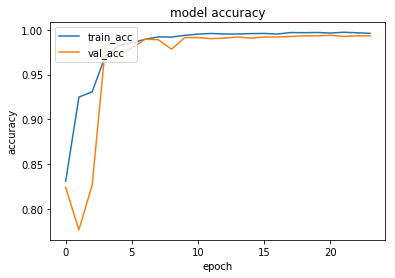

In [0]:
plt.plot(df['acc'])
plt.plot(df['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

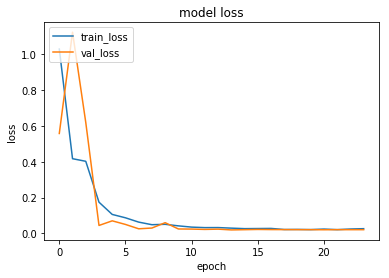

In [0]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')

# **Testing and Evaluation of Model**

In [0]:
import os
import shutil
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

**Testing DataSet Distribution**

In [0]:
folders = os.listdir('/content/Test_Seperated')
total_img = 0
img_num = 0

for folder in folders:
  img_num = 0
  num_images = len(os.listdir('/content/Test_Seperated/'+folder))
  total_img = total_img + num_images
  images = os.listdir('/content/Test_Seperated/'+folder)
  for img in images:
    src = '/content/Test_Seperated/'+folder+'/'+img
    dst = '/content/Test_Seperated/'+folder+'/'+folder+'-'+str(img_num)+'.jpg'
    img_num = img_num+1
    os.rename(src,dst)
    
  print(folder, num_images)
print(total_img)

Night_Market 59
Night_Intersection 134
Day_Market 102
Day_Intersection 128
Night_NarrowStreet 171
Day_NoIntersection 125
Day_Expressway 70
Day_Underpass 203
Day_NarrowStreet 90
Day_Flyover 119
Night_Flyover 180
Night_NoIntersection 48
Night_Underpass 285
Night_Expressway 94
1808


In [0]:
test_generator = test_datagen.flow_from_directory('/content/Test_Seperated', target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical', shuffle=False)

Found 1808 images belonging to 14 classes.


This is how an image look like after pre-processing.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


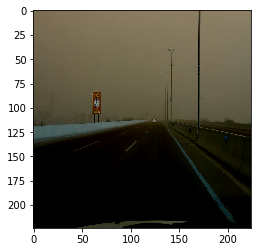

32


In [0]:
import matplotlib.pyplot as plt

x,y = test_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

print(len(x))

In [0]:
a, c = r50.evaluate_generator(test_generator, test_generator.samples // test_generator.batch_size+1, verbose=1)

57/57 [==============================] - 51s 890ms/step


**Model Accuracy**

In [0]:
print('Accuracy:',c)

Accuracy: 0.9900442477876106


In [0]:
def read_landUse(dataset_path, im_type):
    import glob
    paths_X = []   
    labels = [] 
    i = 0
    folders = sorted(os.listdir(dataset_path))
    for folder in folders:
        temp = sorted (glob.glob(os.path.join(dataset_path,folder+'/*'+im_type)))
        for k in range(len(temp)):
            labels.append (i)
        paths_X += temp
        i += 1
        
    if(len(paths_X)==0):
        print ('Dataset could not found. Please provide correct path.')
    return paths_X, labels

In [0]:
Y_pred = r50.predict_generator(test_generator, test_generator.samples // test_generator.batch_size+1, verbose=1)

57/57 [==============================] - 50s 881ms/step


In [0]:
import numpy as np
y_pred = np.argmax(Y_pred, axis=1)

In [0]:
label_map = (test_generator.class_indices)
inv_dict = {v: k for k, v in label_map.items()}
print(inv_dict)

{0: 'Day_Expressway', 1: 'Day_Flyover', 2: 'Day_Intersection', 3: 'Day_Market', 4: 'Day_NarrowStreet', 5: 'Day_NoIntersection', 6: 'Day_Underpass', 7: 'Night_Expressway', 8: 'Night_Flyover', 9: 'Night_Intersection', 10: 'Night_Market', 11: 'Night_NarrowStreet', 12: 'Night_NoIntersection', 13: 'Night_Underpass'}


In [0]:
truth_labels = []
predicted_labels = []

for i in test_generator.classes:
  temp = inv_dict[i]
  truth_labels.append(temp)

for i in y_pred:
  temp = inv_dict[i]
  predicted_labels.append(temp)
  

len(predicted_labels)

# Confusion Matrix

In [0]:
from matplotlib import pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(11, 10), dpi=70, facecolor='w', edgecolor='k')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def my_confusion_matrix(y_test, y_pred, classes):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Normalized confusion matrix')

    plt.show()
    return cnf_matrix

In [0]:
cm = my_confusion_matrix(test_generator.classes, y_pred,inv_dict)

Confusion matrix, without normalization
[[ 70   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 123   0   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0 102   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   7   0   0 118   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 203   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  94   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 179   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0 132   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0  59   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1 170   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0  46   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 285]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   

<Figure size 432x288 with 0 Axes>

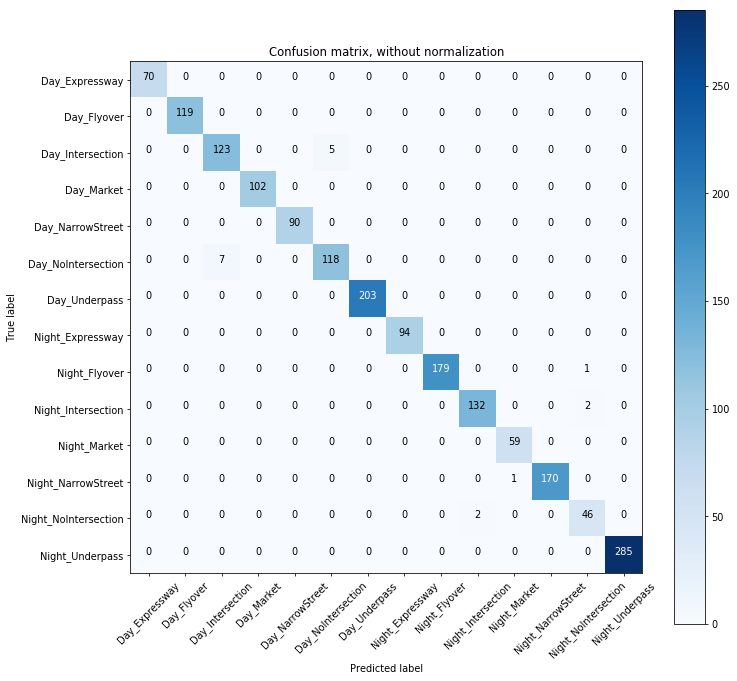

<Figure size 432x288 with 0 Axes>

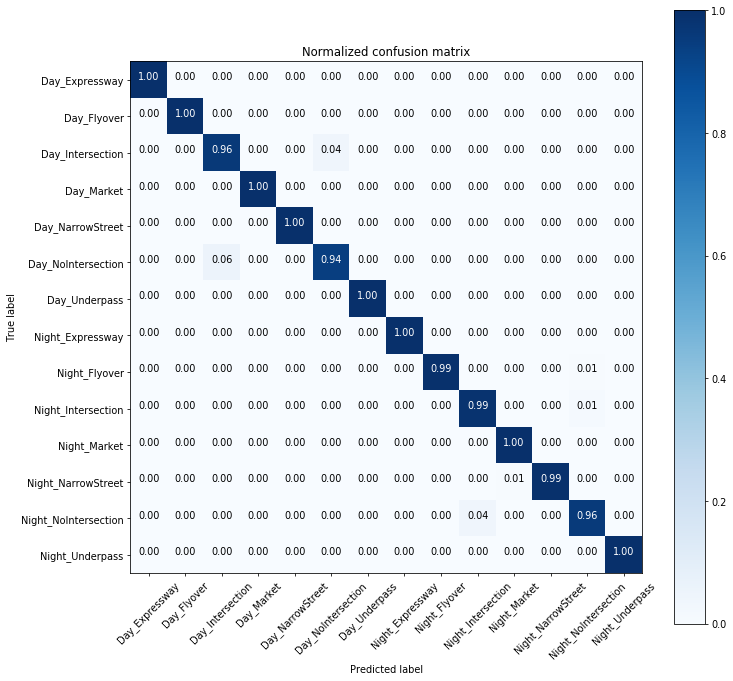

In [0]:
cm = my_confusion_matrix(truth_labels, predicted_labels,classes = list(inv_dict.values()))

# Video Testing


The frames from video are required to be saved in exact sequence as they appear. So, list is made below which is then sorted in alphanumeric characters.

In [0]:
def sort(lst): 
    lst = [str(i) for i in lst] 
    lst.sort() 
    lst = [int(i) if i.isdigit() else i for i in lst ] 
    return lst 
              
# Driver code 
num_list = list(range(150))
num_list = sort(num_list)
print(num_list)

[0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [0]:
import cv2
vidcap = cv2.VideoCapture('/content/gdrive/My Drive/Videos for testing/underpass_expressway_2.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway_2/underpass_expressway_2/"+str(num_list[count])+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
seq = ""
success = getFrame(sec)
while success:
    count = count + 1
    # seq = seq + str(count)
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [0]:
import os
path = '/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

for f in files:
    print(f)

In [0]:
underpass_expressway = os.listdir('/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway2')

for f in range(0, len(underpass_expressway)):
  underpass_expressway[f] = '/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway2/' + underpass_expressway[f]

print(underpass_expressway)

['/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway2/underpass_expressway2 (1)', '/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway2/underpass_expressway2']


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

In [0]:
# test_generator = test_datagen.flow_from_directory('/content/Test_Seperated', target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical', shuffle=False)

T_generator = test_datagen.flow_from_directory("/content/gdrive/My Drive/Video Frames for Inception Testing/underpass_expressway_2", target_size = IMAGE_SIZE, batch_size = 82, class_mode = 'categorical', shuffle=False)

In [0]:
import numpy as np

In [0]:
Y_pred = r50.predict_generator(T_generator, T_generator.samples // T_generator.batch_size, verbose=1)
print(len(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)

1/1 [==============================] - 4s 4s/step
82


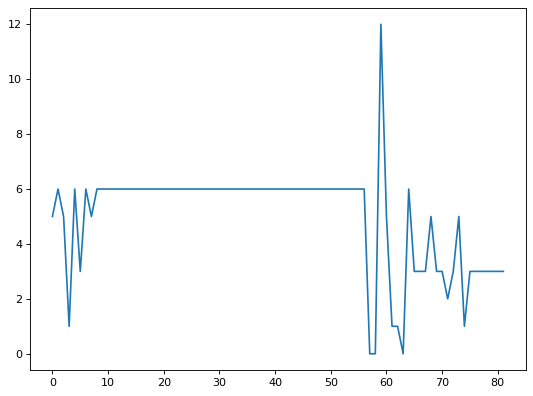

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(indices, y_pred)

Above graph represent how the scene was changing with time in the given video. The video was captured when the car was moving through through underpass, towards the market road. The graph is somewhat correct as the video was about transition from underpass to market road. The classification of the frames are correct but at the time of transition from underpass to market road we can see that there is a noise, as indicated by irregular pattern from frame number 57 to 73.



So, the next part is how we can train our model to figure this out that the scene is chaniging from underpass to market road. And this is where your input will be required the most. 



Sir recommended to look into 'state transition from motion' i.e. which usually happens when a person is sitting from standing position.


Other ideas are also welcome.

In [0]:
label_map = (test_generator.class_indices)
inv_dict = {v: k for k, v in label_map.items()}
print(inv_dict)

{0: 'Day_Expressway', 1: 'Day_Flyover', 2: 'Day_Intersection', 3: 'Day_Market', 4: 'Day_NarrowStreet', 5: 'Day_NoIntersection', 6: 'Day_Underpass', 7: 'Night_Expressway', 8: 'Night_Flyover', 9: 'Night_Intersection', 10: 'Night_Market', 11: 'Night_NarrowStreet', 12: 'Night_NoIntersection', 13: 'Night_Underpass'}
